## Analise de Remuneração Liquida de Postos do Poder Executivo Federal

#### Importando Bibliotecas

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Inicio da Analise

In [7]:
df = pd.read_csv('5233-liquidosexoraca.csv', sep = ';')
df.head()

,Unnamed: 0,ano,sexo_raça,liquido
0,1,1999,Homem Branco,"6527,2"
1,2,1999,Homem Negro,"4768,7"
2,3,1999,Mulher Branca,"5261,6"
3,4,1999,Mulher Negra,4010
4,5,2000,Homem Branco,"5690,3"


In [9]:
# Retirando a primeira coluna
df = df[['ano', 'sexo_raça', 'liquido']]
df.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,"6527,2"
1,1999,Homem Negro,"4768,7"
2,1999,Mulher Branca,"5261,6"
3,1999,Mulher Negra,4010
4,2000,Homem Branco,"5690,3"


In [12]:
# Explorando os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ano        88 non-null     int64 
 1   sexo_raça  88 non-null     object
 2   liquido    88 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [26]:
# Tirando as virgulas e colocando pontos para reconhecer dado como numerico
df['liquido'] = df['liquido'].str.replace(',','.').astype(float)

C:\Users\chris\AppData\Local\Temp\ipykernel_3076\4016114861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['liquido'] = df['liquido'].str.replace(',','.').astype(float)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        88 non-null     int64  
 1   sexo_raça  88 non-null     object 
 2   liquido    88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


#### Agrupando dados por Cor e Genero
* Obsevando por Média de Rendimento

In [31]:
### Agrupando informações
remun_cor_genero = df.groupby(['sexo_raça'])['liquido'].mean().reset_index()
remun_cor_genero['liquido'] = round(remun_cor_genero['liquido'],2) 
remun_cor_genero


,sexo_raça,liquido
0,Homem Branco,7738.23
1,Homem Negro,5460.00
2,Mulher Branca,6718.90
3,Mulher Negra,5066.83


[Text(0, 1, 'R$ 7.738,23'),
 Text(0, 1, 'R$ 5.460'),
 Text(0, 1, 'R$ 6.718,90'),
 Text(0, 1, 'R$ 5.066,83')]

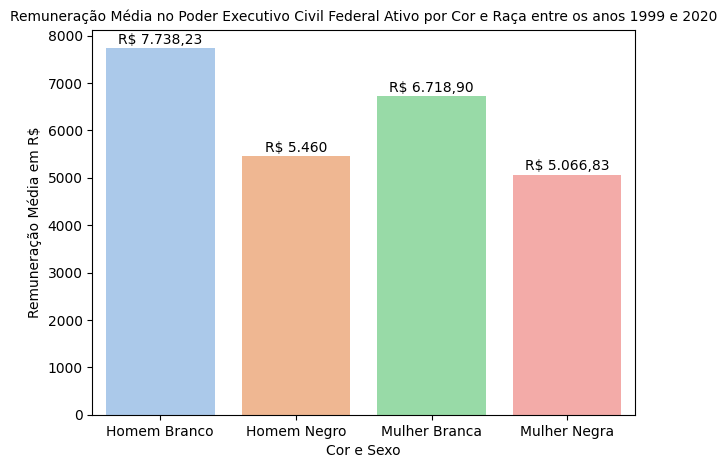

In [74]:
## Produzindo o gráfico
f, ax1 = plt.subplots(figsize=(7, 5))
ax1 = sns.barplot(data = remun_cor_genero ,x= 'sexo_raça', y='liquido', palette="pastel")
plt.xlabel('Cor e Sexo', size = 10)
plt.ylabel('Remuneração Média em R$')
plt.title('Remuneração Média no Poder Executivo Civil Federal Ativo por Cor e Raça entre os anos 1999 e 2020', size = 10)
ax1.bar_label(ax1.containers[0], label_type='edge', padding=1, labels = ["R$ 7.738,23", "R$ 5.460", 'R$ 6.718,90', 'R$ 5.066,83'])




#### Elaborando analise de comparativo de Rendimentos cor e sexo pela Média de Remuneração

In [76]:
# Observando a média anual
media_anual = df.groupby(['ano'])['liquido'].mean().reset_index()
media_anual['liquido'] = round(media_anual['liquido'],2) 
media_anual.head()

,ano,liquido
0,1999,5141.88
1,2000,4627.95
2,2001,4668.25
3,2002,5099.00
4,2003,4864.82


In [91]:
# Jutando a a média anual a base original
df_com_media_anual = df.merge(media_anual, left_on='ano', right_on='ano')
df_com_media_anual.rename(columns={'liquido_y': 'media_do_ano',
'liquido_x' : 'media_por_rs'}, inplace=True)
df_com_media_anual.head()

,ano,sexo_raça,media_por_rs,media_do_ano
0,1999,Homem Branco,6527.2,5141.88
1,1999,Homem Negro,4768.7,5141.88
2,1999,Mulher Branca,5261.6,5141.88
3,1999,Mulher Negra,4010.0,5141.88
4,2000,Homem Branco,5690.3,4627.95


In [93]:
# Criando coluna de Valor Comparativo
df_com_media_anual['compa_percent'] = round(df_com_media_anual['media_por_rs'] / df_com_media_anual['media_do_ano'] - 1,2)*100
df_com_media_anual.head()

,ano,sexo_raça,media_por_rs,media_do_ano,compa_percent
0,1999,Homem Branco,6527.2,5141.88,27.0
1,1999,Homem Negro,4768.7,5141.88,-7.0
2,1999,Mulher Branca,5261.6,5141.88,2.0
3,1999,Mulher Negra,4010.0,5141.88,-22.0
4,2000,Homem Branco,5690.3,4627.95,23.0


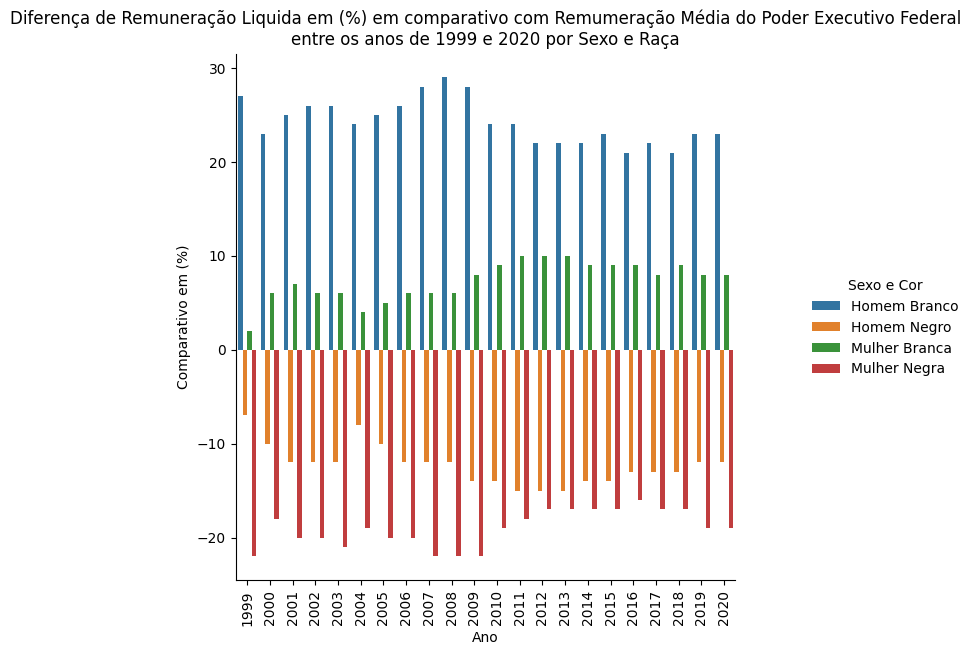

In [114]:
g1 = sns.catplot(data=df_com_media_anual, kind="bar",x="ano", y="compa_percent", hue="sexo_raça", alpha=1, height=6)
plt.xticks(rotation = 90)
plt.xlabel('Ano')
plt.ylabel('Comparativo em (%)')
plt.title('Diferença de Remuneração Liquida em (%) em comparativo com Remumeração Média do Poder Executivo Federal\nentre os anos de 1999 e 2020 por Sexo e Raça',
size = 12)
g1._legend.set_title('Sexo e Cor')
